<a href="https://colab.research.google.com/github/asribavan/cind820---capstone-project/blob/main/Explore_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

In [5]:
import os
print(os.listdir("/content/sample_data"))

['anscombe.json', 'README.md', 'yelp_academic_dataset_business.json', 'mnist_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv', 'california_housing_test.csv']


In [30]:
users = []
with open('/content/sample_data/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
df = pd.DataFrame(users)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   100000 non-null  object 
 1   name          100000 non-null  object 
 2   address       100000 non-null  object 
 3   city          100000 non-null  object 
 4   state         100000 non-null  object 
 5   postal_code   100000 non-null  object 
 6   latitude      100000 non-null  float64
 7   longitude     100000 non-null  float64
 8   stars         100000 non-null  float64
 9   review_count  100000 non-null  int64  
 10  is_open       100000 non-null  int64  
 11  attributes    90915 non-null   object 
 12  categories    99931 non-null   object 
 13  hours         84564 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 10.7+ MB


In [8]:
df.describe()

,latitude,longitude,stars,review_count,is_open
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,36.667424,-89.377957,3.597235,44.797370,0.796200
std,5.873946,14.916590,0.974157,115.331887,0.402824
min,27.555127,-120.095137,1.000000,5.000000,0.000000
25%,32.186827,-90.358516,3.000000,8.000000,1.000000
50%,38.773531,-86.122645,3.500000,15.000000,1.000000
75%,39.954097,-75.424966,4.500000,37.000000,1.000000
max,53.679197,-74.658572,5.000000,6093.000000,1.000000


In [21]:
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


business_id     ---kPU91CF4Lq2-WlRu9Lw
name                      Grow Academy
address                               
city                            AMBLER
state                               AB
postal_code                           
latitude                     27.555127
longitude                  -120.095137
stars                              1.0
review_count                         5
is_open                              0
dtype: object

In [22]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


business_id                                zzyx5x0Z7xXWWvWnZFuxlQ
name            ​​Transformational Abdominal Massage by Jada D...
address                                           ​185 E State St
city                                                      ​Lithia
state                                                         XMS
postal_code                                               T9E 0V3
latitude                                                53.679197
longitude                                              -74.658572
stars                                                         5.0
review_count                                                 6093
is_open                                                         1
dtype: object

In [24]:
df.sort_values('stars')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
57898,fbYmeFCcOln6qTzJtJHmyw,Baseball Collector's Daily,6614 Clayton Rd,Clayton,MO,63117,38.633181,-90.315487,1.0,9,0,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Hobby Shops, Shopping",None
58478,DPBQac3-AAtGbRnR2tWK1A,Edible Arrangements,516 High St,Mount Holly,NJ,08060,40.004931,-74.796318,1.0,21,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Flowers & Gifts, Food, Fruits & Veggies, Shopp...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
95438,NKQU_lyRezWY3F-S2eLZww,La-Z-Boy Furniture Galleries,9935 E Adamo Dr,Tampa,FL,33619,27.945003,-82.339792,1.0,14,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Home & Garden, Interior Design, Furniture Stor...","{'Monday': '0:0-0:0', 'Tuesday': '9:30-19:0', ..."
17759,GyeQcjnQ-LgD2ftFWzOmFA,Appliance Man Sam,"8710 W Hillsborough Ave, Ste 224",Tampa,FL,33615,27.996125,-82.582822,1.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Shopping, Appliances, Local Services, Home & G...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
6594,eMPDDd3jc-NLNGFrK78u_w,Advantage Auto Sales & Credit,4856 Bethlehem Pike,Telford,PA,18969,40.344262,-75.303932,1.0,5,1,None,"Automotive, Car Dealers","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86837,3Vd57ANDvkfct_4tWMItZg,Kims Restaurant,1809 N Black Horse Pike,Williamstown,NJ,08094,39.708979,-75.013133,5.0,117,0,"{'RestaurantsReservations': 'True', 'GoodForMe...","Korean, Restaurants","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
40685,2iUaaBHOfYl1b1MDhSIx5A,Nu Age Aesthetics,"1101 S Belcher Rd, Ste F",Largo,FL,33771,27.907203,-82.744560,5.0,7,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Beauty & Spas, Medical Spas,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
40680,Gn5W714F7tjvUPKvX9oyNw,Squeaky Detail,"500 Polk St, Ste 33",Greenwood,IN,46143,39.609405,-86.098507,5.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Automotive, Car Wash, Auto Detailing","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."
40751,px4RN0AwKv6PDN4T8hsc8w,Ibay Photography,2203 Taffy Dr,Kenner,LA,70065,30.017071,-90.236912,5.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Wedding Planning, Session Photography, Event P...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [27]:
df.isnull()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [19]:
yelp_stars=df.groupby("stars")
yelp_stars.mean()

,latitude,longitude,review_count,is_open
stars,,,,
1.0,36.768139,-87.918794,13.725490,0.848416
1.5,36.506470,-87.674638,20.530849,0.844838
2.0,36.903117,-88.349994,22.003293,0.813264
2.5,36.972413,-88.448169,27.346722,0.779195
3.0,36.977180,-88.918924,35.228787,0.742685
3.5,36.890658,-89.046387,52.268907,0.748891
4.0,36.655187,-89.203231,70.324769,0.780830
4.5,36.346296,-90.049849,55.468477,0.830218
5.0,36.144478,-91.762277,16.323810,0.890337


In [20]:
yelp_stars.mean().corr()

,latitude,longitude,review_count,is_open
latitude,1.000000,0.683784,0.031729,-0.789558
longitude,0.683784,1.000000,-0.164381,-0.339314
review_count,0.031729,-0.164381,1.000000,-0.544774
is_open,-0.789558,-0.339314,-0.544774,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Total Star Rating ')

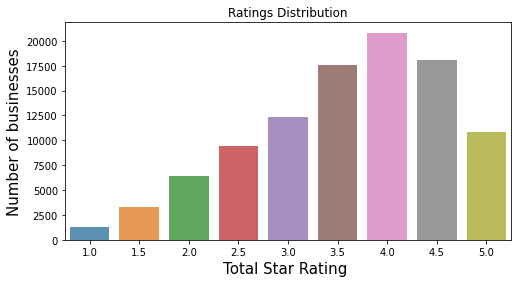

In [9]:
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Ratings Distribution")
plt.ylabel('Number of businesses', fontsize=15)
plt.xlabel('Total Star Rating ', fontsize=15)

In [10]:
business_categories = ''.join(df['categories'].astype('str'))
categories=pd.DataFrame(business_categories.split(','),columns=['categories'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Cities')

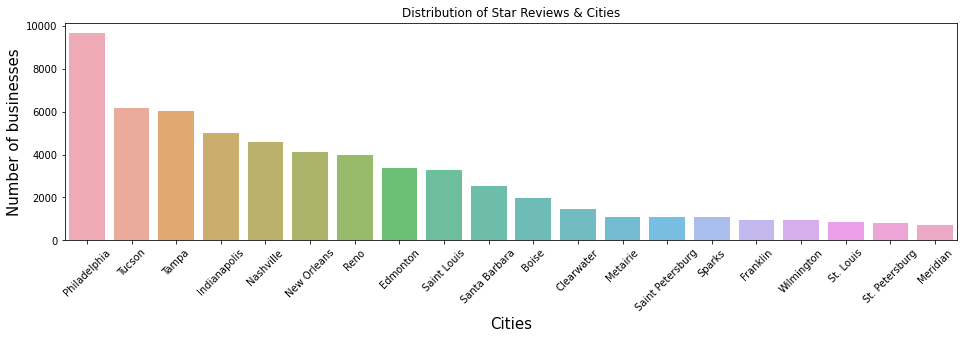

In [32]:
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of Star Reviews & Cities")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Number of businesses', fontsize=15)
plt.xlabel('Cities', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


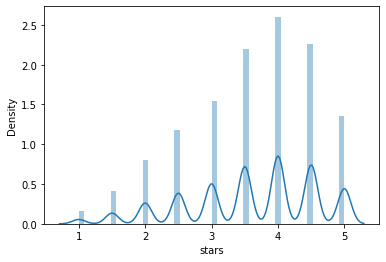

In [14]:
sns.distplot(df.stars,kde=True,hist=True)

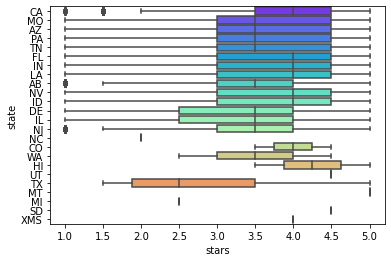

In [16]:
sns.boxplot(data=df, x="stars", y="state",palette="rainbow")

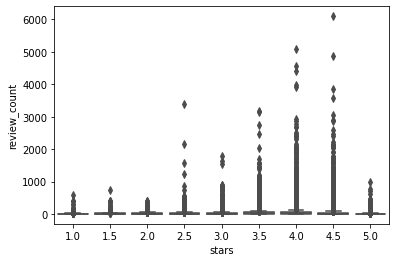

In [17]:
sns.boxplot(data=df, x="stars", y="review_count",palette="rainbow")